In [2]:
# Magic to automatically update imports if functions in utils are changed
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

In [3]:
from sklearn.model_selection import train_test_split

stores_train = pd.read_csv("data/stores_train.csv")
stores_train, stores_val = train_test_split(stores_train, test_size=0.2, random_state=0)

In [4]:
plaace_hierarchy = pd.read_csv("data/plaace_hierarchy.csv")

In [5]:
plaace_1_desc = dict(zip(plaace_hierarchy.lv1, plaace_hierarchy.lv1_desc))
plaace_1_desc = {str(k):v for k,v in plaace_1_desc.items()}
plaace_2_desc = dict(zip(plaace_hierarchy.lv2, plaace_hierarchy.lv2_desc))
plaace_2_desc = {str(k):v for k,v in plaace_2_desc.items()}
plaace_3_desc = dict(zip(plaace_hierarchy.lv3, plaace_hierarchy.lv3_desc))
plaace_3_desc = {str(k):v for k,v in plaace_3_desc.items()}
plaace_4_desc = dict(zip(plaace_hierarchy.lv4, plaace_hierarchy.lv4_desc))
plaace_4_desc = {str(k):v for k,v in plaace_4_desc.items()}

In [6]:
relevant_cols = ["store_id", "plaace_hierarchy_id", "revenue"]

stores_train = stores_train[relevant_cols]
stores_val = stores_val[relevant_cols]

In [7]:
from utils import split_plaace_cat

stores_train = split_plaace_cat(stores_train)
stores_val = split_plaace_cat(stores_val)

In [8]:
def get_std_mean_count(df: pd.DataFrame, plaace_gran: int, plaace_vals: list[str]):
    new_df = df[df["plaace_cat_" + str(plaace_gran)].isin(plaace_vals)]
    return new_df.revenue.std(), new_df.revenue.mean(), new_df.shape[0]

# Plotting the standard deviation and count

## Plaace_1

In [9]:
plaace_1_dfs = {}

for plaace_1 in stores_train.plaace_cat_1.unique():
    plaace_1_dfs[plaace_1] = stores_train[stores_train.plaace_cat_1 == plaace_1]

plaace_1_dfs_rev_std = {}
plaace_1_dfs_rev_mean = {}
plaace_1_dfs_count = {}

for df_name, df in plaace_1_dfs.items():
    plaace_1_dfs_rev_std[df_name] = df.revenue.std()
    plaace_1_dfs_rev_mean[df_name] = df.revenue.mean()
    plaace_1_dfs_count[df_name] = df.shape[0]

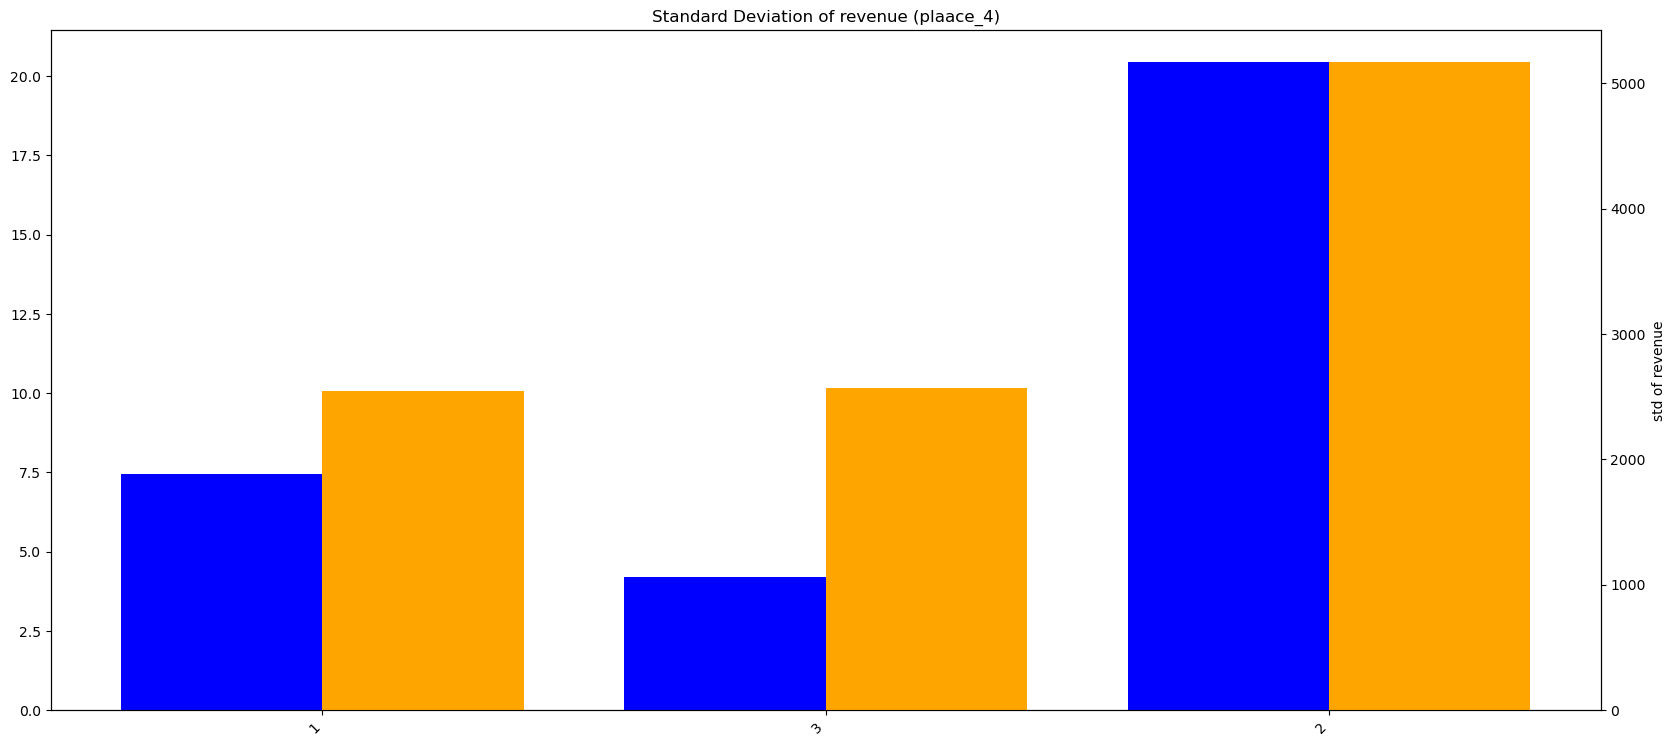

In [10]:
fig = plt.figure(figsize=(20, 10))
fig.autofmt_xdate(rotation=45)
ax = fig.add_subplot(111)
ax2 = ax.twinx()

x_ticks = np.arange(len(plaace_1_dfs.keys()))

width = 0.4

ax.bar(x_ticks - width/2, plaace_1_dfs_rev_std.values(), width=width, color="blue")
ax2.bar(x_ticks + width/2, plaace_1_dfs_count.values(), width=width, color="orange")

ax.set_xticks(x_ticks)
ax.set_xticklabels(plaace_1_dfs.keys(), rotation = 45, ha="right")

plt.title("Standard Deviation of revenue (plaace_4)")
plt.xlabel("plaace_cat_4")
plt.ylabel("std of revenue")
plt.show();

## Plaace_2

In [11]:
plaace_2_dfs = {}

for plaace_2 in stores_train.plaace_cat_2.unique():
    plaace_2_dfs[str(plaace_2)] = stores_train[stores_train.plaace_cat_2 == plaace_2]

plaace_2_dfs_rev_std = {}
plaace_2_dfs_rev_mean = {}
plaace_2_dfs_count = {}

for df_name, df in plaace_2_dfs.items():
    plaace_2_dfs_rev_std[df_name] = df.revenue.std()
    plaace_2_dfs_rev_mean[df_name] = df.revenue.mean()
    plaace_2_dfs_count[df_name] = df.shape[0]

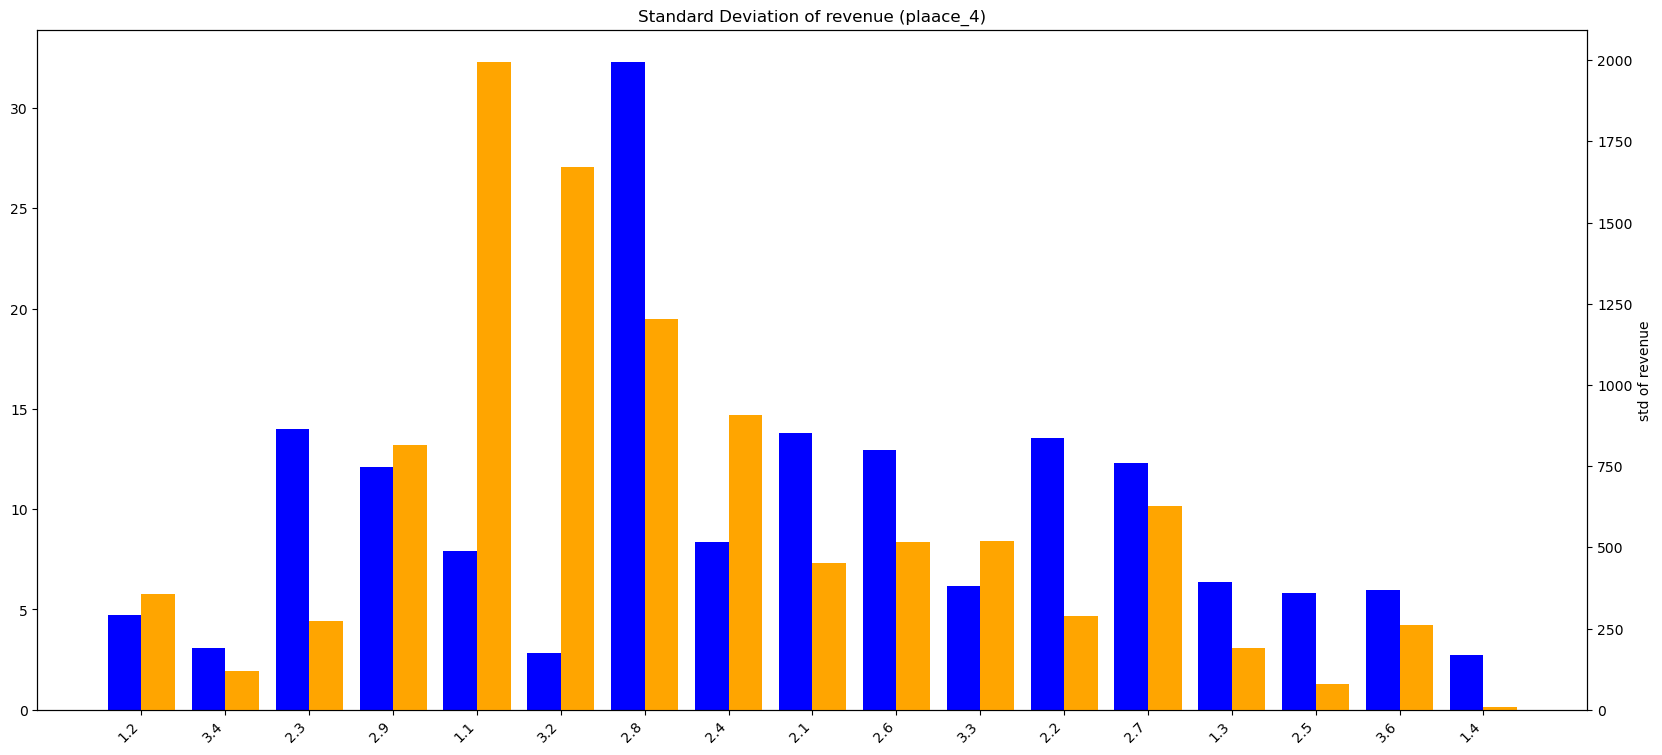

In [12]:
fig = plt.figure(figsize=(20, 10))
fig.autofmt_xdate(rotation=45)
ax = fig.add_subplot(111)
ax2 = ax.twinx()

x_ticks = np.arange(len(plaace_2_dfs.keys()))

width = 0.4

ax.bar(x_ticks - width/2, plaace_2_dfs_rev_std.values(), width=width, color="blue")
ax2.bar(x_ticks + width/2, plaace_2_dfs_count.values(), width=width, color="orange")

ax.set_xticks(x_ticks)
ax.set_xticklabels(plaace_2_dfs.keys(), rotation = 45, ha="right")

plt.title("Standard Deviation of revenue (plaace_4)")
plt.xlabel("plaace_cat_4")
plt.ylabel("std of revenue")
plt.show();

## Plaace 3

In [13]:
plaace_3_dfs = {}

for plaace_3 in stores_train.plaace_cat_3.unique():
    plaace_3_dfs[str(plaace_3)] = stores_train[stores_train.plaace_cat_3 == plaace_3]

plaace_3_dfs_rev_std = {}
plaace_3_dfs_rev_mean = {}
plaace_3_dfs_count = {}

for df_name, df in plaace_3_dfs.items():
    plaace_3_dfs_rev_std[df_name] = df.revenue.std()
    plaace_3_dfs_rev_mean[df_name] = df.revenue.mean()
    plaace_3_dfs_count[df_name] = df.shape[0]

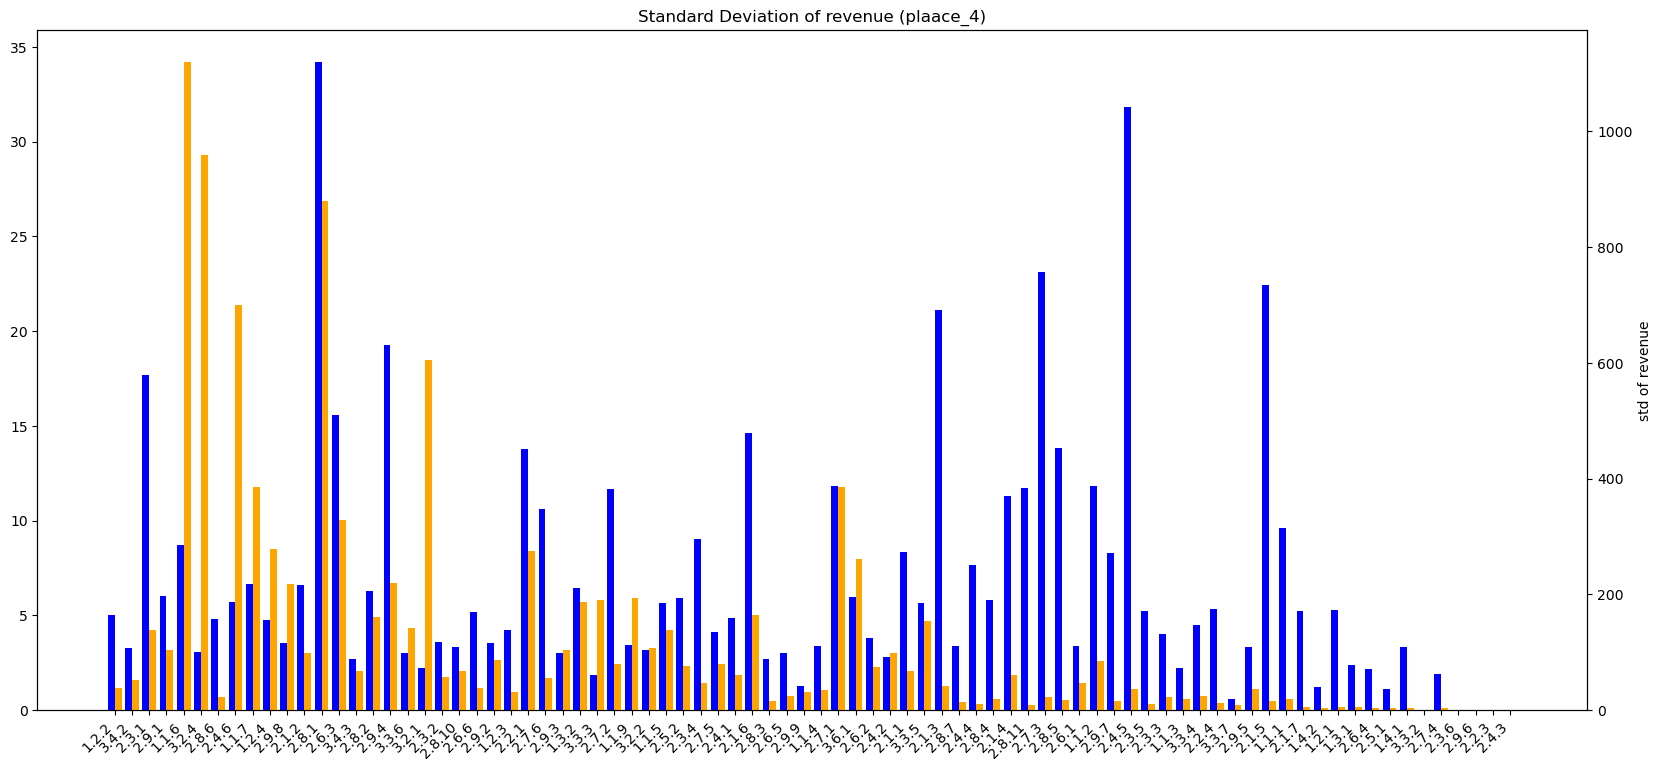

In [14]:
fig = plt.figure(figsize=(20, 10))
fig.autofmt_xdate(rotation=45)
ax = fig.add_subplot(111)
ax2 = ax.twinx()

x_ticks = np.arange(len(plaace_3_dfs.keys()))

width = 0.4

ax.bar(x_ticks - width/2, plaace_3_dfs_rev_std.values(), width=width, color="blue")
ax2.bar(x_ticks + width/2, plaace_3_dfs_count.values(), width=width, color="orange")

ax.set_xticks(x_ticks)
ax.set_xticklabels(plaace_3_dfs.keys(), rotation = 45, ha="right")

plt.title("Standard Deviation of revenue (plaace_4)")
plt.xlabel("plaace_cat_4")
plt.ylabel("std of revenue")
plt.show();

## Plaace_4

In [15]:
plaace_4_dfs = {}

for plaace_4 in stores_train.plaace_cat_4.unique():
    plaace_4_dfs[str(plaace_4)] = stores_train[stores_train.plaace_cat_4 == plaace_4]

plaace_4_dfs_rev_std = {}
plaace_4_dfs_rev_mean = {}
plaace_4_dfs_count = {}

for df_name, df in plaace_4_dfs.items():
    plaace_4_dfs_rev_std[df_name] = df.revenue.std()
    plaace_4_dfs_rev_mean[df_name] = df.revenue.mean()
    plaace_4_dfs_count[df_name] = df.shape[0]

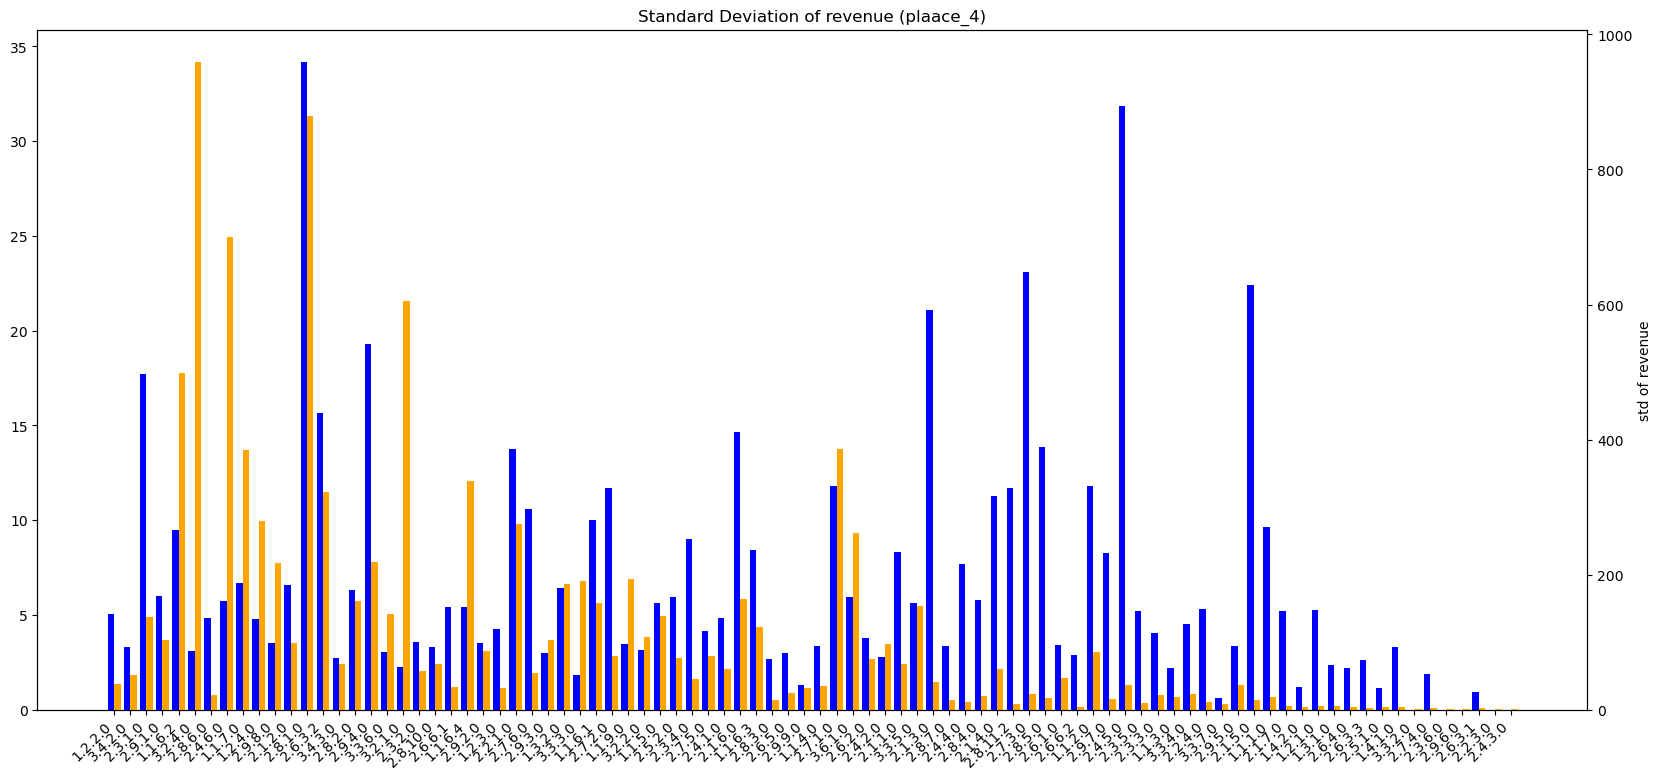

In [16]:
fig = plt.figure(figsize=(20, 10))
fig.autofmt_xdate(rotation=45)
ax = fig.add_subplot(111)
ax2 = ax.twinx()

x_ticks = np.arange(len(plaace_4_dfs.keys()))

width = 0.4

ax.bar(x_ticks - width/2, plaace_4_dfs_rev_std.values(), width=width, color="blue")
ax2.bar(x_ticks + width/2, plaace_4_dfs_count.values(), width=width, color="orange")

ax.set_xticks(x_ticks)
ax.set_xticklabels(plaace_4_dfs.keys(), rotation = 45, ha="right")

plt.title("Standard Deviation of revenue (plaace_4)")
plt.xlabel("plaace_cat_4")
plt.ylabel("std of revenue")
plt.show();

# Investigating plaace_cateogries (by values)

In [18]:
for k, v in plaace_1_dfs_rev_std.items():
    print(f"{plaace_1_desc[k]}({k}) - ".rjust(35) + f"std: {v:.2f} mean: {plaace_1_dfs_rev_mean[k]:.2f} count: {plaace_1_dfs_count[k]}")

       Dining and Experiences(1) - std: 7.45 mean: 5.75 count: 2548
                     Services(3) - std: 4.21 mean: 2.81 count: 2572
                       Retail(2) - std: 20.43 mean: 12.35 count: 5167


2 has wayyyy to high std, we need to go deeper. This is probably true for 1 aswell, and might be true for 3. Let's start by investigating plaace_cat_1 == 3

## Plaace_cat_1 == 3

In [19]:
for k, v in plaace_2_dfs_rev_std.items():
    if k.startswith("3."):
        print(f"{plaace_2_desc[k]}({k}) - ".rjust(35) + f"std: {v:.2f} mean: {plaace_2_dfs_rev_mean[k]:.2f} count: {plaace_2_dfs_count[k]}")

             Other Services(3.4) - std: 3.07 mean: 2.11 count: 119
       Beauty and wellbeing(3.2) - std: 2.83 mean: 2.22 count: 1671
              Professionals(3.3) - std: 6.16 mean: 4.33 count: 521
                       Gyms(3.6) - std: 5.95 mean: 3.87 count: 261


'3.4' and '3.2' seem really promising, although we don't have to many support vectors for '3.4'. For '3.3' and '3.6', we again need to go deeper. Since '3.4' and '3.2' have similar mean and std as well, it might be worth combining them.

### Plaace_cat_2 == 3.3

In [20]:
for k, v in plaace_3_dfs_rev_std.items():
    if k.startswith("3.3."):
        print(f"{plaace_3_desc[k]}({k}) - ".rjust(40) + f"std: {v:.2f} mean: {plaace_3_dfs_rev_mean[k]:.2f} count: {plaace_3_dfs_count[k]}")

                      Jewelers(3.3.6) - std: 3.02 mean: 4.33 count: 142
                 Photographers(3.3.3) - std: 1.86 mean: 1.32 count: 191
                     Opticians(3.3.5) - std: 5.65 mean: 7.61 count: 154
                   Watchmakers(3.3.4) - std: 4.50 mean: 4.47 count: 24
 Key and shoe reparation shops(3.3.7) - std: 0.61 mean: 1.23 count: 9
          Construction workers(3.3.2) - std: nan mean: 98.94 count: 1


Most columns in '3.3' seem to sparse to use, but we can try extracting '3.3.3' while keeping the other as '3.3'.

### Plaace_cat_2 == 3.6

In [20]:
for k, v in plaace_3_dfs_rev_std.items():
    if k.startswith("3.6."):
        print(f"{plaace_3_desc[k]}({k}) - ".rjust(35) + f"std: {v:.2f} mean: {plaace_3_dfs_rev_mean[k]:.2f} count: {plaace_3_dfs_count[k]}")

                     Gyms(3.6.1) - std: 5.95 mean: 3.87 count: 261


No need to go deeper on '3.6' as it only contains one category.

### Plaace_cat_2 == 3.2 or 3.4

In [30]:
new_plaace_3_2_std, new_plaace_3_2_mean, new_plaace_3_2_count = get_std_mean_count(stores_train, 2, ["3.2", "3.4"])
for k, v in plaace_2_dfs_rev_std.items():
    if k.startswith("3.2") or k.startswith("3.4"):
        print(f"{plaace_2_desc[k]}({k}) - ".rjust(35) + f"std: {v:.2f} mean: {plaace_2_dfs_rev_mean[k]:.2f} count: {plaace_2_dfs_count[k]}")

print(f"Combined columns(3.2/3.4) - ".rjust(35) + f"std: {new_plaace_3_2_std:.2f} mean: {new_plaace_3_2_mean:.2f} count: {new_plaace_3_2_count}")

             Other Services(3.4) - std: 3.07 mean: 2.11 count: 119
       Beauty and wellbeing(3.2) - std: 2.83 mean: 2.22 count: 1671
       Combined columns(3.2/3.4) - std: 2.85 mean: 2.21 count: 1790


It seems like including the column does little to change the std. It might be worth it as it increases the robustness.

## Plaace_cat_1 == 1

In [226]:
for k, v in plaace_2_dfs_rev_std.items():
    if k.startswith("1."):
        print(f"{plaace_2_desc[k]}({k}) - ".rjust(30) + f"std: {v:.2f} mean: {plaace_2_dfs_rev_mean[k]:.2f} count: {plaace_2_dfs_count[k]}")

       Bakery and cafe(1.2) - std: 4.74 mean: 4.79 count: 355
            Restaurant(1.1) - std: 7.92 mean: 5.93 count: 1994
         Pubs and bars(1.3) - std: 6.39 mean: 5.81 count: 191
                 Shops(1.4) - std: 2.73 mean: 2.84 count: 8


Not really a lot to get from this. '1.4' is way too small and should just be part of '1' or some other plaace_id. '1.1' has a lot of values, but a high std. It's time to go deeper. '1.2' is the only one that seems slightly more promising, but maybe we can do better there as well. Let's investigate.

### Plaace_cat_2 == 1.1

In [202]:
for k, v in plaace_3_dfs_rev_std.items():
    if k.startswith("1.1."):
        print(f"{plaace_3_desc[k]}({k}):".rjust(35) + f" std: {v:.2f} mean: {plaace_3_dfs_rev_mean[k]:.2f} count: {plaace_3_dfs_count[k]}")

               Other dining(1.1.6): std: 8.70 mean: 6.66 count: 1119
    Hotels with restaurants(1.1.7): std: 6.66 mean: 4.66 count: 385
                  Fast food(1.1.9): std: 3.46 mean: 3.95 count: 193
          Pizza restaurants(1.1.5): std: 5.63 mean: 5.44 count: 139
        Chinese restaurants(1.1.4): std: 3.36 mean: 3.54 count: 35
  Sushi and wok restaurants(1.1.2): std: 11.82 mean: 7.49 count: 85
           Thai restaurants(1.1.3): std: 2.20 mean: 4.33 count: 19
      Hamburger restaurants(1.1.1): std: 9.62 mean: 11.14 count: 19


Maybe we can extract '1.1.6' as this has the highest count and highest std. For the others, I would recommend keeping the others as '1.1'. Just to be on the safe side, let's look at '1.1.7' aswell.

#### Plaace_cat_3 == 1.1.x

In [42]:
new_1_1_cols = ["1.1.1", "1.1.2", "1.1.3", "1.1.4", "1.1.5", "1.1.9"]

new_plaace_1_1_std, new_plaace_1_1_mean, new_plaace_1_1_count = get_std_mean_count(
    stores_train, 
    3, 
    new_1_1_cols
    )

print(f"Combined(1.1.x):".rjust(35) + f" std: {new_plaace_1_1_std:.2f} mean: {new_plaace_1_1_mean:.2f} count: {new_plaace_1_1_count}")

                   Combined(1.1.x): std: 6.72 mean: 5.25 count: 490


In [43]:
mean_1_1_std, mean_1_1_mean, mean_1_1_count = 0, 0, 0

for k, v in plaace_3_dfs_rev_std.items():
    if k in new_1_1_cols:
        mean_1_1_std += plaace_3_dfs_rev_std[k] * plaace_3_dfs_count[k]
        mean_1_1_mean += plaace_3_dfs_rev_mean[k] * plaace_3_dfs_count[k]
        mean_1_1_count += plaace_3_dfs_count[k]

mean_1_1_std /= mean_1_1_count
mean_1_1_mean /= mean_1_1_count

print(mean_1_1_std, mean_1_1_mean)

5.709041195291469 5.250908163265306


Keeping the categories separate leads to a lower std, but the small sample size still leads me to believe that they should be combined.

#### Plaace_cat_3 == 1.1.6

In [227]:
for k, v in plaace_4_dfs_rev_std.items():
    if k.startswith("1.1.6."):
        print(f"{plaace_4_desc[k]}({k}) - ".rjust(35) + f"std: {v:.2f} mean: {plaace_4_dfs_rev_mean[k]:.2f} count: {plaace_4_dfs_count[k]}")

            Restaurants(1.1.6.2) - std: 9.50 mean: 8.39 count: 499
      Belongs to dining(1.1.6.4) - std: 5.41 mean: 3.40 count: 339
               Eateries(1.1.6.1) - std: 10.02 mean: 7.47 count: 158
  Restaurants and cafes(1.1.6.3) - std: 8.40 mean: 7.58 count: 123


The '1.1.6' branch seems like a mess. This is hard to solve, and problematic since it involves 1119 rows in the training dataset.

#### Plaace_cat_3 == 1.1.7

In [228]:
for k, v in plaace_4_dfs_rev_std.items():
    if k.startswith("1.1.7."):
        print(f"{plaace_4_desc[k]}({k}) - ".rjust(35) + f"std: {v:.2f} mean: {plaace_4_dfs_rev_mean[k]:.2f} count: {plaace_4_dfs_count[k]}")

Hotels with restaurants(1.1.7.0) - std: 6.66 mean: 4.66 count: 385


No reason to split it up further as there is only one subcategory.

### Plaace_cat_2 == 1.2

In [230]:
for k, v in plaace_3_dfs_rev_std.items():
    if k.startswith("1.2."):
        print(f"{plaace_3_desc[k]}({k}) - ".rjust(35) + f"std: {v:.2f} mean: {plaace_3_dfs_rev_mean[k]:.2f} count: {plaace_3_dfs_count[k]}")

              Bakery shop(1.2.2) - std: 5.03 mean: 5.45 count: 38
                    Cafes(1.2.4) - std: 4.76 mean: 4.77 count: 279
             Coffee shops(1.2.3) - std: 4.25 mean: 4.16 count: 32
                 Bakeries(1.2.1) - std: 5.28 mean: 4.93 count: 6


No real gain to when splitting '1.2' further, recommend keeping it as '1.2'.

### Plaace_cat_2 == 1.4

In [45]:
for k, v in plaace_3_dfs_rev_std.items():
    if k.startswith("1.4."):
        print(f"{plaace_3_desc[k]}({k}) - ".rjust(35) + f"std: {v:.2f} mean: {plaace_3_dfs_rev_mean[k]:.2f} count: {plaace_3_dfs_count[k]}")

Ice cream and smoothie shops(1.4.2) - std: 1.20 mean: 1.48 count: 4
           Sandwich shops(1.4.1) - std: 3.32 mean: 4.20 count: 4


Sandwich shops seems like it can be combined with the other fast food shop. Not sure what to do with the ice cream shops. Maybe remove them from the training set completely. We could maybe manually just guess the mean for every single ice cream shop we encounter in test?

## Plaace_cat_1 == 2

In [231]:
for k, v in plaace_2_dfs_rev_std.items():
    if k.startswith("2."):
        print(f"{plaace_2_desc[k]}({k}) - ".rjust(35) + f"std: {v:.2f} mean: {plaace_2_dfs_rev_mean[k]:.2f} count: {plaace_2_dfs_count[k]}")

         Electronics stores(2.3) - std: 14.00 mean: 9.51 count: 274
             Home and decor(2.9) - std: 12.08 mean: 7.78 count: 816
            Food and drinks(2.8) - std: 32.28 mean: 26.36 count: 1204
            Clothing stores(2.4) - std: 8.35 mean: 4.84 count: 908
         House and building(2.1) - std: 13.78 mean: 11.86 count: 453
         Sports and leisure(2.6) - std: 12.93 mean: 8.12 count: 517
             Cars and boats(2.2) - std: 13.55 mean: 15.88 count: 288
               Other Retail(2.7) - std: 12.28 mean: 6.88 count: 627
        Jewelry and perfume(2.5) - std: 5.80 mean: 3.32 count: 80


Here everything seems quite bad. Maybe we can keep '2.4' and '2.5' as is (or combine them), but the rest are really bad. Let's investigate further!

### Plaace_cat_2 == 2.1

In [46]:
for k, v in plaace_3_dfs_rev_std.items():
    if k.startswith("2.1."):
        print(f"{plaace_3_desc[k]}({k}) - ".rjust(35) + f"std: {v:.2f} mean: {plaace_3_dfs_rev_mean[k]:.2f} count: {plaace_3_dfs_count[k]}")

            Paint dealers(2.1.2) - std: 6.58 mean: 8.59 count: 99
      Construction stores(2.1.6) - std: 14.63 mean: 12.57 count: 164
          Hardware stores(2.1.1) - std: 8.33 mean: 8.88 count: 67
    Kitchen design stores(2.1.3) - std: 21.09 mean: 21.70 count: 41
          Plumbing stores(2.1.4) - std: 11.29 mean: 9.26 count: 61
              Tile stores(2.1.5) - std: 22.41 mean: 25.94 count: 15
    Interior design shops(2.1.7) - std: 5.22 mean: 3.97 count: 6


'2.1.7' is too small to keep on its own. '2.1.1', '2.1.2', and '2.1.4' seems like they share some values. Lets combine them (and maybe with '2.1.6' as well). '2.1.3' and '2.1.5' seems quite similar aswell, although with a high std.

#### Plaace_cat_3 == 2.1.6

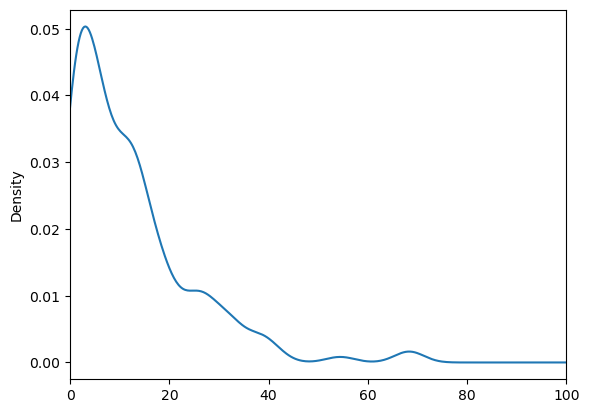

In [12]:
stores_train[stores_train.plaace_cat_3 == "2.1.6"].revenue.plot(kind="kde", xlim=(0, 100), bw_method=0.2);

Let's combine it with the others.

#### Plaace_cat_3 == 2.1.3 / 2.1.5

In [22]:
for k, v in plaace_4_dfs_rev_std.items():
    if k.startswith("2.1.3."):
        print(f"{plaace_4_desc[k]}({k}) - ".rjust(35) + f"std: {v:.2f} mean: {plaace_4_dfs_rev_mean[k]:.2f} count: {plaace_4_dfs_count[k]}")

  Kitchen design stores(2.1.3.0) - std: 21.09 mean: 21.70 count: 41


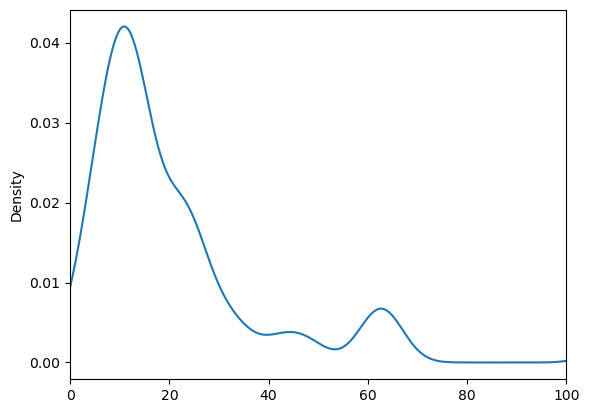

In [24]:
stores_train[stores_train.plaace_cat_3 == "2.1.3"].revenue.plot(kind="kde", xlim=(0, 100), bw_method=0.2);

In [23]:
for k, v in plaace_4_dfs_rev_std.items():
    if k.startswith("2.1.5."):
        print(f"{plaace_4_desc[k]}({k}) - ".rjust(35) + f"std: {v:.2f} mean: {plaace_4_dfs_rev_mean[k]:.2f} count: {plaace_4_dfs_count[k]}")

            Tile stores(2.1.5.0) - std: 22.41 mean: 25.94 count: 15


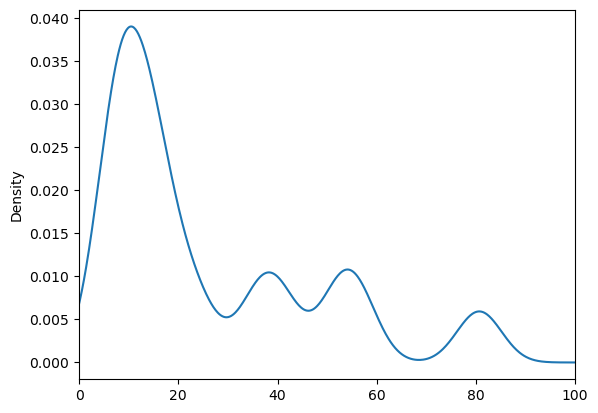

In [25]:
stores_train[stores_train.plaace_cat_3 == "2.1.5"].revenue.plot(kind="kde", xlim=(0, 100), bw_method=0.2);

Nothing to be done, lets merge them as is!

### Plaace_cat_2 == 2.2

In [47]:
for k, v in plaace_3_dfs_rev_std.items():
    if k.startswith("2.2."):
        print(f"{plaace_3_desc[k]}({k}) - ".rjust(35) + f"std: {v:.2f} mean: {plaace_3_dfs_rev_mean[k]:.2f} count: {plaace_3_dfs_count[k]}")

             Gas stations(2.2.1) - std: 13.75 mean: 16.19 count: 275
         Car tire dealers(2.2.4) - std: 5.32 mean: 9.61 count: 12
            Boating shops(2.2.3) - std: nan mean: 6.56 count: 1


Not much to do here as the categories are really small.

### Plaace_cat_2 == 2.3

In [93]:
for k, v in plaace_3_dfs_rev_std.items():
    if k.startswith("2.3."):
        print(f"{plaace_3_desc[k]}({k}) - ".rjust(35) + f"std: {v:.2f} mean: {plaace_3_dfs_rev_mean[k]:.2f} count: {plaace_3_dfs_count[k]}")

       Electronics stores(2.3.1) - std: 17.70 mean: 13.94 count: 138
            Telecom shops(2.3.2) - std: 3.57 mean: 5.96 count: 57
          Computer stores(2.3.4) - std: 9.02 mean: 4.54 count: 46
        Multimedia stores(2.3.5) - std: 5.22 mean: 2.93 count: 10
          Lighting stores(2.3.3) - std: 4.03 mean: 4.19 count: 22
   Audio and video stores(2.3.6) - std: nan mean: 11.12 count: 1


Again, small categories and the dominant having the highest std. Lets plot it.

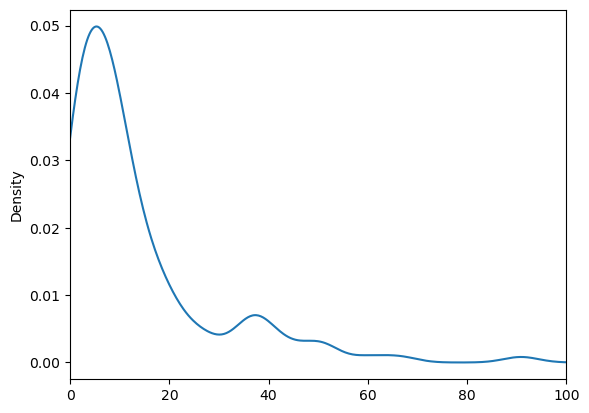

In [142]:
stores_train[stores_train.plaace_cat_3 == "2.3.1"].revenue.plot(kind="kde", xlim=(0, 100), bw_method=0.2);

Not easyli divided into two (or more) subcategories, unless we find a reliable way to identify the bump at ~40 revenue

### Plaace_cat_2 == 2.4

In [104]:
for k, v in plaace_3_dfs_rev_std.items():
    if k.startswith("2.4."):
        print(f"{plaace_3_desc[k]}({k}) - ".rjust(35) + f"std: {v:.2f} mean: {plaace_3_dfs_rev_mean[k]:.2f} count: {plaace_3_dfs_count[k]}")

          Clothing stores(2.4.6) - std: 5.71 mean: 4.65 count: 700
  Women’s clothing stores(2.4.1) - std: 4.86 mean: 4.86 count: 61
              Shoe stores(2.4.2) - std: 2.78 mean: 4.00 count: 98
    Men’s clothing stores(2.4.4) - std: 7.67 mean: 6.33 count: 11
Children’s clothing and equipment stores(2.4.5) - std: 31.85 mean: 10.25 count: 37
  Thrift shops - clothing(2.4.3) - std: nan mean: 0.29 count: 1


'2.4.3' is a rare outlier. The same is '2.4.5', but seeing as it has very low count, we can't keep it on its own. The others seem fine to combine.

### Plaace_cat_2 == 2.5

In [120]:
for k, v in plaace_3_dfs_rev_std.items():
    if k.startswith("2.5."):
        print(f"{plaace_3_desc[k]}({k}) - ".rjust(35) + f"std: {v:.2f} mean: {plaace_3_dfs_rev_mean[k]:.2f} count: {plaace_3_dfs_count[k]}")

              Perfumeries(2.5.2) - std: 5.93 mean: 3.43 count: 76
           Jewelry stores(2.5.1) - std: 1.13 mean: 1.25 count: 4


There are very few jewelry stores. Maybe remove them from training?

### Plaace_cat_2 == 2.6

In [121]:
for k, v in plaace_3_dfs_rev_std.items():
    if k.startswith("2.6."):
        print(f"{plaace_3_desc[k]}({k}) - ".rjust(35) + f"std: {v:.2f} mean: {plaace_3_dfs_rev_mean[k]:.2f} count: {plaace_3_dfs_count[k]}")

            Sports stores(2.6.3) - std: 15.56 mean: 10.30 count: 328
              Music shops(2.6.6) - std: 5.16 mean: 5.71 count: 38
              Photo shops(2.6.5) - std: 3.01 mean: 3.32 count: 25
               Toy stores(2.6.2) - std: 3.79 mean: 4.55 count: 75
               Bookstores(2.6.1) - std: 3.39 mean: 3.60 count: 47
              Hobby shops(2.6.4) - std: 2.19 mean: 2.77 count: 4


Except for '2.6.3', they all roughly share mean and std, maybe combine? As for '2.6.3', lets see if we can improve on the score.

#### Plaace_cat_3 == 2.6.3

In [122]:
for k, v in plaace_4_dfs_rev_std.items():
    if k.startswith("2.6.3."):
        print(f"{plaace_4_desc[k]}({k}) - ".rjust(35) + f"std: {v:.2f} mean: {plaace_4_dfs_rev_mean[k]:.2f} count: {plaace_4_dfs_count[k]}")

  Sporting goods stores(2.6.3.2) - std: 15.66 mean: 10.45 count: 322
             Golf shops(2.6.3.3) - std: 2.65 mean: 1.77 count: 3
  Sports apparel stores(2.6.3.1) - std: 0.95 mean: 2.54 count: 3


It does not seem like a simple split will suffice. Lets plot the revenue of all shops in '2.6.3'

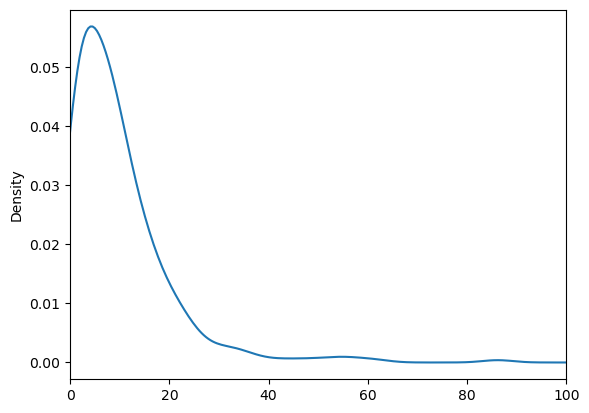

In [143]:
stores_train[stores_train.plaace_cat_3 == "2.6.3"].revenue.plot(kind="kde", xlim=(0, 100), bw_method=0.2);

### Plaace_cat_2 == 2.7

In [148]:
for k, v in plaace_3_dfs_rev_std.items():
    if k.startswith("2.7."):
        print(f"{plaace_3_desc[k]}({k}) - ".rjust(35) + f"std: {v:.2f} mean: {plaace_3_dfs_rev_mean[k]:.2f} count: {plaace_3_dfs_count[k]}")

               Pharmacies(2.7.6) - std: 10.61 mean: 16.34 count: 55
       Multi-goods stores(2.7.2) - std: 11.69 mean: 13.06 count: 80
               Pet stores(2.7.5) - std: 4.13 mean: 3.97 count: 80
             Other stores(2.7.1) - std: 11.81 mean: 4.72 count: 386
Travel accessories stores(2.7.3) - std: 23.12 mean: 9.65 count: 23
            Erotica shops(2.7.4) - std: 1.90 mean: 2.00 count: 3


### Plaace_cat_2 == 2.8

In [147]:
for k, v in plaace_3_dfs_rev_std.items():
    if k.startswith("2.8."):
        print(f"{plaace_3_desc[k]}({k}) - ".rjust(35) + f"std: {v:.2f} mean: {plaace_3_dfs_rev_mean[k]:.2f} count: {plaace_3_dfs_count[k]}")

               Fish shops(2.8.6) - std: 4.82 mean: 4.97 count: 22
           Grocery stores(2.8.1) - std: 33.84 mean: 32.04 count: 955
                   Kiosks(2.8.2) - std: 6.30 mean: 3.82 count: 161
                 Butchers(2.8.3) - std: 2.69 mean: 3.58 count: 15
     Coffee and tea shops(2.8.7) - std: 3.38 mean: 4.12 count: 14
            Delicatessens(2.8.4) - std: 5.80 mean: 4.04 count: 20
Fruit and vegetable shops(2.8.5) - std: 13.85 mean: 12.96 count: 17


The by far most problematic (and prominent) category is '2.8.1'. Here, we need to do better. Lets dig deeper.

#### Plaace_cat_3 == 2.8.1

In [149]:
for k, v in plaace_4_dfs_rev_std.items():
    if k.startswith("2.8.1."):
        print(f"{plaace_4_desc[k]}({k}) - ".rjust(35) + f"std: {v:.2f} mean: {plaace_4_dfs_rev_mean[k]:.2f} count: {plaace_4_dfs_count[k]}")

         Grocery stores(2.8.1.0) - std: 34.17 mean: 34.47 count: 879


Wow, no subcategories. There is hope still, lets see if we can find another way to split it.

In [156]:
grocery_stores = stores_train[stores_train.plaace_cat_3 == "2.8.1"]

In [174]:
no_chain_grocery = grocery_stores[grocery_stores.chain_name.isna()]
print(f"No chain grocery - std: {no_chain_grocery.revenue.std():.2f} mean: {no_chain_grocery.revenue.mean():.2f} count: {no_chain_grocery.shape[0]}")

No chain grocery - std: 8.27 mean: 5.09 count: 168


This looks way better! It seems like grocery stores that dont belong to chains make way less money:

In [183]:
import math

for chain_name in grocery_stores.chain_name.unique():
    if(type(chain_name) != str):
        continue
    no_chain_grocery = grocery_stores[grocery_stores.chain_name == chain_name]
    print(f"{chain_name} - std: {no_chain_grocery.revenue.std():.2f} mean: {no_chain_grocery.revenue.mean():.2f} count: {no_chain_grocery.shape[0]}")

COOP PRIX - std: 17.82 mean: 37.81 count: 8
COOP EXTRA - std: 16.73 mean: 50.79 count: 30
REMA FRANCHISE NORGE - std: 35.05 mean: 67.86 count: 223
COOP MEGA - std: nan mean: 63.19 count: 1
MATKROKEN - std: 6.59 mean: 9.41 count: 29
BUNNPRIS & GOURMET - std: 20.89 mean: 53.95 count: 6
KIWI NORGE - std: 30.72 mean: 45.25 count: 54
JOKER - std: 6.22 mean: 13.24 count: 132
BUNNPRIS - std: 9.54 mean: 24.57 count: 96
COOP MARKED - std: 13.89 mean: 15.30 count: 13
NÆRBUTIKKEN - std: 3.25 mean: 6.17 count: 58
SPAR - std: 27.27 mean: 40.35 count: 71
SUNKOST BUTIKK - std: 2.67 mean: 3.87 count: 21
EUROSPAR - std: 3.60 mean: 116.91 count: 2
LIFE - std: 2.11 mean: 3.46 count: 11
MENY - std: 32.45 mean: 89.11 count: 19
H NATURKOST - std: 5.06 mean: 6.17 count: 9
GULATING GRUPPEN - std: 19.97 mean: 15.28 count: 3
SNARKJØP GRUPPEN - std: nan mean: 3.97 count: 1


Hmm, this didn't seem to improve std of most. Its seems like COOP stores (except COOP MARKED), SPAR, along with KIWI NORGE (and maybe REMA) would make a good "large grocery stores" category.

### Plaace_cat_2 == 2.9

In [146]:
for k, v in plaace_3_dfs_rev_std.items():
    if k.startswith("2.9."):
        print(f"{plaace_3_desc[k]}({k}) - ".rjust(35) + f"std: {v:.2f} mean: {plaace_3_dfs_rev_mean[k]:.2f} count: {plaace_3_dfs_count[k]}")

Gifts and interior design shops(2.9.1) - std: 6.00 mean: 6.40 count: 103
             Flower shops(2.9.8) - std: 3.54 mean: 3.79 count: 218
         Furniture stores(2.9.4) - std: 19.29 mean: 16.64 count: 219
 Kitchen equipment stores(2.9.2) - std: 3.53 mean: 5.10 count: 87
       Home textile shops(2.9.3) - std: 2.99 mean: 3.15 count: 103
Thrift shops - home furnishings and decor(2.9.9) - std: 1.28 mean: 1.31 count: 32
           Garden centers(2.9.7) - std: 8.29 mean: 14.19 count: 16
    Yarn and sewing shops(2.9.5) - std: 3.34 mean: 3.68 count: 37
            Carpet stores(2.9.6) - std: nan mean: 47.61 count: 1


# Extra

In [91]:
p4_vals = list([mean, plaace_4_desc[val], val] for mean, std, count, val in zip(plaace_4_dfs_rev_mean.values(), plaace_4_dfs_rev_std.values(), plaace_4_dfs_count.values(), plaace_4_dfs_count.keys()))
p4_vals.sort()

In [92]:
import pprint

pprint.pprint(p4_vals)

[[0.288, 'Thrift shops - clothing', '2.4.3.0'],
 [1.2296666666666667, 'Key and shoe reparation shops', '3.3.7.0'],
 [1.2545, 'Jewelry stores', '2.5.1.0'],
 [1.3100312500000002, 'Thrift shops - home furnishings and decor', '2.9.9.0'],
 [1.3214240837696334, 'Photographers', '3.3.3.0'],
 [1.438134328358209, 'Personal service providers', '3.4.3.0'],
 [1.4772500000000002, 'Ice cream and smoothie shops', '1.4.2.0'],
 [1.7713333333333336, 'Golf shops', '2.6.3.3'],
 [1.9330917622523462, 'Spas', '3.2.4.0'],
 [1.998, 'Erotica shops', '2.7.4.0'],
 [2.3915514018691586, 'Skincare salons', '3.2.2.0'],
 [2.538666666666667, 'Sports apparel stores', '2.6.3.1'],
 [2.632742148760331, 'Hairdressers', '3.2.1.0'],
 [2.7729999999999997, 'Hobby shops', '2.6.4.0'],
 [2.9288000000000003, 'Multimedia stores', '2.3.5.0'],
 [2.9716923076923076, 'Laundromats and dry cleaners', '3.4.2.0'],
 [2.9876000000000005, 'Bars', '1.3.1.0'],
 [3.147077669902913, 'Home textile shops', '2.9.3.0'],
 [3.31844, 'Photo shops', '2.6.

# Merge

In [1]:
keep_plaace_3 = [
    ( ['3.5.1','3.5.2','3.5.3','3.5.4','3.5.5',], 'Agencies' ),
    ( ['3.4.1', '3.4.3', '3.4.2'], 'Banks and financial institutions service providers' ), # slightly different, add '3.4.2'
    ( ['3.3.7'], 'Key and shoe repair shops' ),
    ( ['3.3.1', '3.3.2'], 'Other services' ),
    ( ['3.3.3'], 'Photographers' ),
    ( ['3.3.4','3.3.5','3.3.6',], 'Luxury item makers' ),
    ( ['3.2.1','3.2.2','3.2.3','3.2.4',], 'Beauty and care' ),
    ( ['3.1.1','3.1.2','3.1.3','3.1.4',], 'Health care' ),
    ( ['2.9.7', '2.9.4'], 'Furniture and Garden' ),
    ( ['2.9.1','2.9.2','2.9.3','2.9.5', '2.9.8'], 'Home item shops' ),
    ( ['2.9.6'], 'Carpet store' ),
    ( ['2.9.9'], 'Thrift Shop' ),
    ( ['2.8.1', '2.8.9'], 'Grocery stores' ),
    ( ['2.8.3', '2.8.4','2.8.5','2.8.6','2.8.7','2.8.8','2.8.10','2.8.11','2.8.12',], 'Specialty food stores' ),
    ( ['2.8.2'], 'Kiosks' ),
    ( ['2.7.1','2.7.3','2.7.4','2.7.5',], 'Random item stores' ),
    ( ['2.7.2'], 'Multi goods stores' ),
    ( ['2.7.6'], 'Pharamcies' ),
    ( ['2.6.1','2.6.2','2.6.3','2.6.4','2.6.5','2.6.7','2.6.9',], 'Spare time shops' ),
    ( ['2.6.8'], 'Sporting goods store' ),
    ( ['2.5.1', '2.5.2'], 'Luxury stores' ),
    ( ['2.4.1','2.4.2','2.4.3','2.4.4','2.4.5','2.4.6',], 'Clothing stores' ),
    ( ['2.3.2','2.3.3','2.3.4','2.3.5','2.3.6',], 'Specialized electronics store' ),
    ( ['2.3.1'], 'Electronics stores' ),
    ( ['2.2.1'], 'Gas stations' ),
    ( ['2.2.2','2.2.3','2.2.4'], 'Transportation shops' ), # low count
    ( ['2.1.1','2.1.2','2.1.4','2.1.6'], 'Specialized hardware stores' ),
    ( ['2.1.3','2.1.5'], 'Room hardware stores' ), # have high variance
    ( ['2.1.7'], 'Interior design stores' ), # very low count
    ( ['1.5.1', '1.5.2', '1.5.3'], 'Entertainment venues' ),
    ( ['1.4.1', '1.4.2'], 'Small food and drink shops' ),
    ( ['1.3.1', '1.3.2'], 'Pubs and bars' ),
    ( ['1.2.1', '1.2.2', '1.2.3','1.2.4'], 'Cafe like shops' ),
    ( ['1.1.5', '1.1.9', ], 'Fast food and pizza' ),
    ( ['1.1.2', '1.1.3', '1.1.4'], 'Asian restaurants' ),
    ( ['1.1.11', '1.1.7', '1.1.8'], 'Random restaurants' ),
    ( ['1.1.1', '1.1.10'], 'General restaurants' ),
]